# SARK-110 Smith Chart example

Simple Jupyter notebook example for interacting with the SARK-110 Antenna Analyzer.

Please ensure that the analyzer is connected to the computer using the USB cable and in Computer Control mode.

In [1]:
from sark110 import *
import skrf as rf 
rf.stylely()

Enter frequency limits:

In [2]:
fr_start = 10000000   # Frequency start in Hz
fr_stop =  20000000   # Frequency stop in Hz
points = 101          # Number of points

## Utility functions

In [3]:
def z2vswr(rs: float, xs: float, z0=50 + 0j) -> float:
    gamma = math.sqrt((rs - z0.real) ** 2 + xs ** 2) / math.sqrt((rs + z0.real) ** 2 + xs ** 2)
    if gamma > 0.980197824:
        return 99.999
    swr = (1 + gamma) / (1 - gamma)
    return swr


def z2mag(r: float, x: float) -> float:
    return math.sqrt(r ** 2 + x ** 2)


def z2gamma(rs: float, xs: float, z0=50 + 0j) -> complex:
    z = complex(rs, xs)
    return (z - z0) / (z + z0)

## Connect to the device

In [4]:
sark110 = Sark110()
sark110.open()
sark110.connect()
if not sark110.is_connected:
    print("Device not connected")
    exit(-1)
else:
    print("Device connected")

Device connected


In [5]:
sark110.buzzer()
print(sark110.fw_protocol, sark110.fw_version)

2566 1.5


## Acquire the data

In [6]:
y = []
x = []
rs = [0]
xs = [0]
for i in range(points):
    fr = int(fr_start + i * (fr_stop - fr_start) / (points - 1))
    sark110.measure(fr, rs, xs)
    x.append(fr / 1e9)  # Units in GHz
    y.append(z2gamma(rs[0][0], xs[0][0]))

ring_slot = rf.Network(frequency=x, s=y, z0=50)
ring_slot.frequency.unit = 'mhz'
print(ring_slot)

1-Port Network: '',  10.0-20.0 MHz, 101 pts, z0=[50.+0.j]


# Various charts

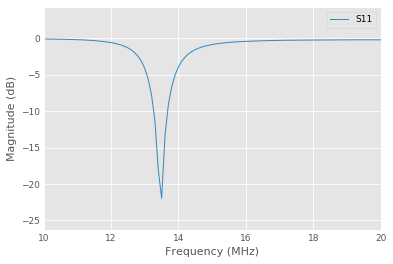

In [12]:
ring_slot.plot_s_db()

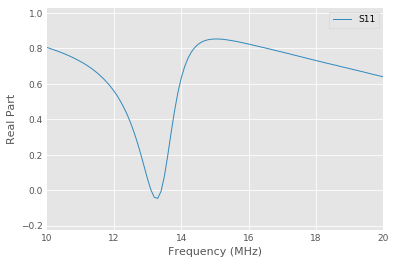

In [13]:
ring_slot.plot_s_re()

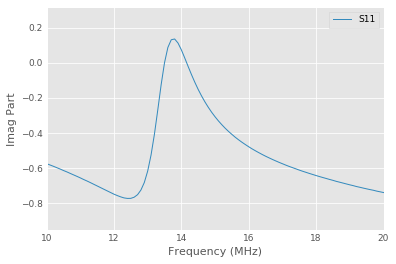

In [14]:
ring_slot.plot_s_im()

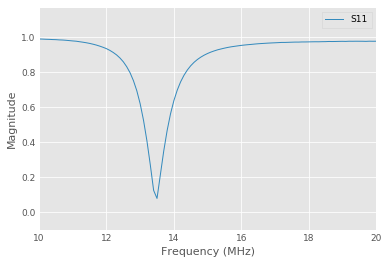

In [15]:
ring_slot.plot_s_mag()

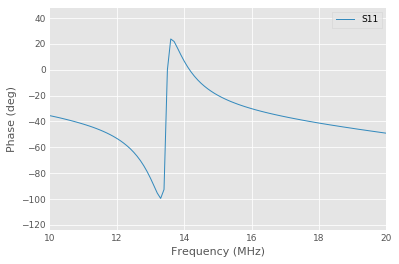

In [11]:
ring_slot.plot_s_deg()

# Smith Chart

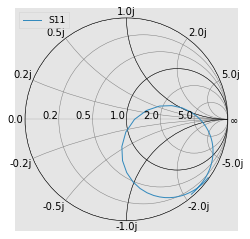

In [8]:
ring_slot.plot_s_smith(draw_labels=True)

In [9]:
sark110.close()